In [45]:
import re
import nltk
from nltk.corpus import stopwords as stw
nltk.download('stopwords')

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
labelenc = LabelEncoder()

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

import pickle
from keras.models import load_model

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PraveenAnandhanathan\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
data = pd.read_csv('smsspamcollection\SMSSpamCollection', delimiter='\t', header = None, names = ['class', 'sms'])
data.head()

,class,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
data['class'].unique() #Finding how many classification in the dataset

array(['ham', 'spam'], dtype=object)

In [4]:
shape = list(data.shape)
shape[0]

5572

In [5]:
corpus = []
for i in range(0, shape[0]):
    sms = re.sub('[^a-zA-Z]', ' ', data['sms'][i])
    sms = sms.lower()
    sms = sms.split()
    sms = [ps.stem(word) for word in sms if not word in set(stw.words('english'))]
    sms = ' '.join(sms)
    corpus.append(sms)
corpus[:5]

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though']

In [6]:
cv = CountVectorizer(max_features = 10000) #Count Vectorization
tfidf =  TfidfVectorizer(max_features=10000, ngram_range=(1,3)) #TFIDF Vectorization
hvectorizer = HashingVectorizer(n_features=10000) #Hash Vectorization

X = tfidf.fit_transform(corpus).toarray()

# X = np.array(corpus)

Y = data.iloc[:, 0].values
Y = labelenc.fit_transform(Y)

In [7]:
#Splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 222)

## Naive Bayesian

In [8]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, Y_train)
pickle.dump(nb, open('models/naive_model.pkl', 'wb'))

In [9]:
nb_y_pred = nb.predict(X_test)

conf = confusion_matrix(Y_test, nb_y_pred)
print("Confusion Matrix:")
print(conf)
nb_acc = accuracy_score(Y_test, nb_y_pred)
print("Accuracy: "+str(nb_acc))
nb_pre = precision_score(Y_test, nb_y_pred)
print("Precision: "+str(nb_pre))
nb_rec = recall_score(Y_test, nb_y_pred)
print("Recall: "+str(nb_rec))
nb_f1 = f1_score(Y_test, nb_y_pred)
print("F1 Score: "+str(nb_f1))
nb_R2 = r2_score(Y_test, nb_y_pred)
print("R^2: "+str(nb_R2))
nb_mse = mean_squared_error(Y_test, nb_y_pred)
print("Mean Squared Error: "+str(nb_mse))
nb_mae = mean_absolute_error(Y_test, nb_y_pred)
print("Mean Absolute Error: "+str(nb_mae))
nb_rmse = sqrt(mean_squared_error(Y_test, nb_y_pred))
print("Root Mean Square Error: "+str(nb_rmse))

Confusion Matrix:
[[889  84]
 [ 13 129]]
Accuracy: 0.9130044843049328
Precision: 0.6056338028169014
Recall: 0.9084507042253521
F1 Score: 0.7267605633802816
R^2: 0.21720973321946047
Mean Squared Error: 0.08699551569506726
Mean Absolute Error: 0.08699551569506726
Root Mean Square Error: 0.2949500223683112


Text(0.5, 1.0, 'Evaluation Metrics for Naive Bayesian')

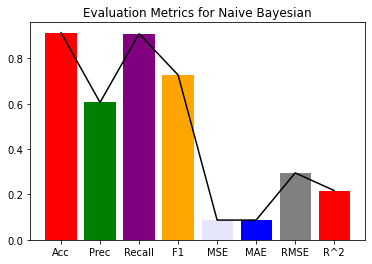

In [10]:
plt.bar(['Acc','Prec','Recall','F1','MSE','MAE','RMSE','R^2'],[nb_acc,nb_pre,nb_rec,nb_f1,nb_mse,nb_mae,nb_rmse,nb_R2],color=['red','green','purple','orange','lavender','blue','grey'])
plt.plot([nb_acc,nb_pre,nb_rec,nb_f1,nb_mse,nb_mae,nb_rmse,nb_R2],color='black')
plt.title('Evaluation Metrics for Naive Bayesian')

## Decision Tree

In [11]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 0, criterion = 'entropy')
dt.fit(X_train, Y_train)
pickle.dump(dt, open('models/dt_model.pkl', 'wb'))

In [12]:
dt_y_pred = dt.predict(X_test)

conf = confusion_matrix(Y_test, dt_y_pred)
print("Confusion Matrix:")
print(conf)
dt_acc = accuracy_score(Y_test, dt_y_pred)
print("Accuracy: "+str(dt_acc))
dt_pre = precision_score(Y_test, dt_y_pred)
print("Precision: "+str(dt_pre))
dt_rec = recall_score(Y_test, dt_y_pred)
print("Recall: "+str(dt_rec))
dt_f1 = f1_score(Y_test, dt_y_pred)
print("F1 Score: "+str(dt_f1))
dt_R2 = r2_score(Y_test, dt_y_pred)
print("R^2: "+str(dt_R2))
dt_mse = mean_squared_error(Y_test, dt_y_pred)
print("Mean Squared Error: "+str(dt_mse))
dt_mae = mean_absolute_error(Y_test, dt_y_pred)
print("Mean Absolute Error: "+str(dt_mae))
dt_rmse = sqrt(mean_squared_error(Y_test, dt_y_pred))
print("Root Mean Square Error: "+str(dt_rmse))

Confusion Matrix:
[[959  14]
 [ 22 120]]
Accuracy: 0.967713004484305
Precision: 0.8955223880597015
Recall: 0.8450704225352113
F1 Score: 0.8695652173913043
R^2: 0.7094799009886658
Mean Squared Error: 0.03228699551569507
Mean Absolute Error: 0.03228699551569507
Root Mean Square Error: 0.17968582447064396


Text(0.5, 1.0, 'Evaluation Metrics for Decision Tree')

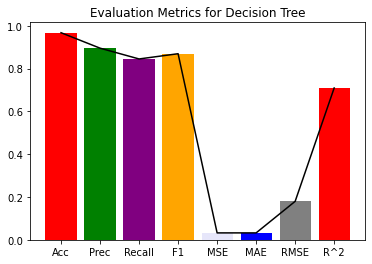

In [13]:
plt.bar(['Acc','Prec','Recall','F1','MSE','MAE','RMSE','R^2'],[dt_acc,dt_pre,dt_rec,dt_f1,dt_mse,dt_mae,dt_rmse,dt_R2],color=['red','green','purple','orange','lavender','blue','grey'])
plt.plot([dt_acc,dt_pre,dt_rec,dt_f1,dt_mse,dt_mae,dt_rmse,dt_R2],color='black')
plt.title('Evaluation Metrics for Decision Tree')

## XGBoost

In [14]:
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(X_train, Y_train)
pickle.dump(xg, open('models/xg_model.pkl', 'wb'))

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:08:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [15]:
xg_y_pred = xg.predict(X_test)

conf = confusion_matrix(Y_test, xg_y_pred)
print("Confusion Matrix:")
print(conf)
xg_acc = accuracy_score(Y_test, xg_y_pred)
print("Accuracy: "+str(xg_acc))
xg_pre = precision_score(Y_test, xg_y_pred)
print("Precision: "+str(xg_pre))
xg_rec = recall_score(Y_test, xg_y_pred)
print("Recall: "+str(xg_rec))
xg_f1 = f1_score(Y_test, xg_y_pred)
print("F1 Score: "+str(xg_f1))
xg_R2 = r2_score(Y_test, xg_y_pred)
print("R^2: "+str(xg_R2))
xg_mse = mean_squared_error(Y_test, xg_y_pred)
print("Mean Squared Error: "+str(xg_mse))
xg_mae = mean_absolute_error(Y_test, xg_y_pred)
print("Mean Absolute Error: "+str(xg_mae))
xg_rmse = sqrt(mean_squared_error(Y_test, xg_y_pred))
print("Root Mean Square Error: "+str(xg_rmse))

Confusion Matrix:
[[972   1]
 [ 18 124]]
Accuracy: 0.9829596412556054
Precision: 0.992
Recall: 0.8732394366197183
F1 Score: 0.9288389513108614
R^2: 0.846669947744018
Mean Squared Error: 0.017040358744394617
Mean Absolute Error: 0.017040358744394617
Root Mean Square Error: 0.13053872507572079


Text(0.5, 1.0, 'Evaluation Metrics for xGBoost')

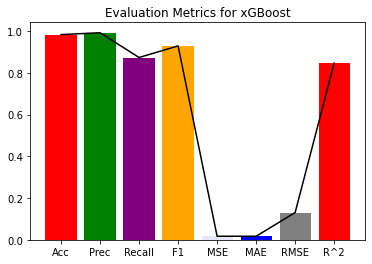

In [16]:
import matplotlib.pyplot as plt

plt.bar(['Acc','Prec','Recall','F1','MSE','MAE','RMSE','R^2'],[xg_acc,xg_pre,xg_rec,xg_f1,xg_mse,xg_mae,xg_rmse,xg_R2],color=['red','green','purple','orange','lavender','blue','grey'])
plt.plot([xg_acc,xg_pre,xg_rec,xg_f1,xg_mse,xg_mae,xg_rmse,xg_R2],color='black')
plt.title('Evaluation Metrics for xGBoost')

## Multilayer Perceptron

In [17]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=1, max_iter=300)
mlp.fit(X_train, Y_train)
pickle.dump(mlp, open('models/mlp_model.pkl', 'wb'))

In [18]:
mlp_y_pred = mlp.predict(X_test)

conf = confusion_matrix(Y_test, mlp_y_pred)
print("Confusion Matrix:")
print(conf)
mlp_acc = accuracy_score(Y_test, mlp_y_pred)
print("Accuracy: "+str(mlp_acc))
mlp_pre = precision_score(Y_test, mlp_y_pred)
print("Precision: "+str(mlp_pre))
mlp_rec = recall_score(Y_test, mlp_y_pred)
print("Recall: "+str(mlp_rec))
mlp_f1 = f1_score(Y_test, mlp_y_pred)
print("F1 Score: "+str(mlp_f1))
mlp_R2 = r2_score(Y_test, mlp_y_pred)
print("R^2: "+str(mlp_R2))
mlp_mse = mean_squared_error(Y_test, mlp_y_pred)
print("Mean Squared Error: "+str(mlp_mse))
mlp_mae = mean_absolute_error(Y_test, mlp_y_pred)
print("Mean Absolute Error: "+str(mlp_mae))
mlp_rmse = sqrt(mean_squared_error(Y_test, mlp_y_pred))
print("Root Mean Square Error: "+str(mlp_rmse))

Confusion Matrix:
[[970   3]
 [ 15 127]]
Accuracy: 0.9838565022421525
Precision: 0.9769230769230769
Recall: 0.8943661971830986
F1 Score: 0.9338235294117647
R^2: 0.8547399504943329
Mean Squared Error: 0.016143497757847534
Mean Absolute Error: 0.016143497757847534
Root Mean Square Error: 0.12705706496628802


Text(0.5, 1.0, 'Evaluation Metrics for Multilayer Perceptron')

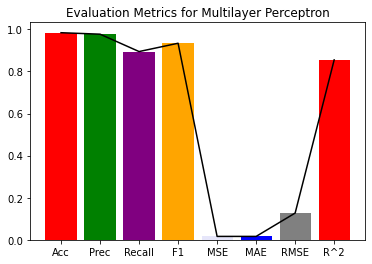

In [19]:
plt.bar(['Acc','Prec','Recall','F1','MSE','MAE','RMSE','R^2'],[mlp_acc,mlp_pre,mlp_rec,mlp_f1,mlp_mse,mlp_mae,mlp_rmse,mlp_R2],color=['red','green','purple','orange','lavender','blue','grey'])
plt.plot([mlp_acc,mlp_pre,mlp_rec,mlp_f1,mlp_mse,mlp_mae,mlp_rmse,mlp_R2],color='black')
plt.title('Evaluation Metrics for Multilayer Perceptron')

## Long Short Term Memory

In [37]:
import tensorflow
from tensorflow.keras.layers import Embedding, Flatten
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

onehot = [one_hot(words, 5000) for words in corpus]
embedded = pad_sequences(onehot, maxlen=50, padding='pre')

In [38]:
lstm = Sequential()
lstm.add(Embedding(5000, 400, input_length=50))
lstm.add(LSTM(200))
lstm.add(Flatten())
lstm.add(Dense(1, activation='sigmoid'))
lstm.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
lstm.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 50, 400)           2000000   
                                                                 
 lstm_4 (LSTM)               (None, 200)               480800    
                                                                 
 flatten_4 (Flatten)         (None, 200)               0         
                                                                 
 dense_4 (Dense)             (None, 1)                 201       
                                                                 
Total params: 2,481,001
Trainable params: 2,481,001
Non-trainable params: 0
_________________________________________________________________


In [39]:
X_arr = np.array(embedded)
Y_arr = np.array(Y)

X_train, X_test, Y_train, Y_test = train_test_split(X_arr, Y_arr, test_size=0.4, random_state=45)
lstm.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10, batch_size=64)
lstm.save('models/lstm_model.h5')

Epoch 1/10
53/53 [==============================] - 9s 138ms/step - loss: 0.0000e+00 - accuracy: 0.8642 - val_loss: 0.0000e+00 - val_accuracy: 0.8636
Epoch 2/10
53/53 [==============================] - 6s 113ms/step - loss: 0.0000e+00 - accuracy: 0.8675 - val_loss: 0.0000e+00 - val_accuracy: 0.8636
Epoch 3/10
53/53 [==============================] - 6s 114ms/step - loss: 0.0000e+00 - accuracy: 0.8675 - val_loss: 0.0000e+00 - val_accuracy: 0.8636
Epoch 4/10
53/53 [==============================] - 6s 113ms/step - loss: 0.0000e+00 - accuracy: 0.8675 - val_loss: 0.0000e+00 - val_accuracy: 0.8636
Epoch 5/10
53/53 [==============================] - 6s 113ms/step - loss: 0.0000e+00 - accuracy: 0.8675 - val_loss: 0.0000e+00 - val_accuracy: 0.8636
Epoch 6/10
53/53 [==============================] - 6s 113ms/step - loss: 0.0000e+00 - accuracy: 0.8675 - val_loss: 0.0000e+00 - val_accuracy: 0.8636
Epoch 7/10
53/53 [==============================] - 6s 112ms/step - loss: 0.0000e+00 - accuracy: 0.8

In [31]:
lstm_y_pred = lstm.predict(x=X_test, verbose=0)

conf = confusion_matrix(Y_test, lstm_y_pred)
print("Confusion Matrix:")
print(conf)
lstm_acc = accuracy_score(Y_test, lstm_y_pred)
print("Accuracy: "+str(lstm_acc))
lstm_pre = precision_score(Y_test, lstm_y_pred)
print("Precision: "+str(lstm_pre))
lstm_rec = recall_score(Y_test, lstm_y_pred)
print("Recall: "+str(lstm_rec))
lstm_f1 = f1_score(Y_test, lstm_y_pred)
print("F1 Score: "+str(lstm_f1))
lstm_R2 = r2_score(Y_test, lstm_y_pred)
print("R^2: "+str(lstm_R2))
lstm_mse = mean_squared_error(Y_test, lstm_y_pred)
print("Mean Squared Error: "+str(lstm_mse))
lstm_mae = mean_absolute_error(Y_test, lstm_y_pred)
print("Mean Absolute Error: "+str(lstm_mae))
lstm_rmse = sqrt(mean_squared_error(Y_test, lstm_y_pred))
print("Root Mean Square Error: "+str(lstm_rmse))


Confusion Matrix:
[[1925    0]
 [ 304    0]]
Accuracy: 0.863615971287573
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
R^2: -0.15792207792207802
Mean Squared Error: 0.1363840287124271
Mean Absolute Error: 0.1363840287124271
Root Mean Square Error: 0.36930208327658687


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Evaluation Metrics for LSTM')

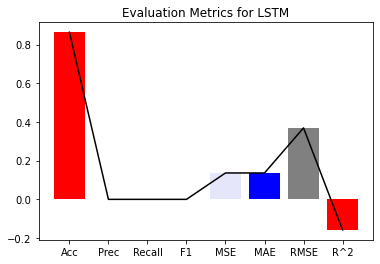

In [32]:
plt.bar(['Acc','Prec','Recall','F1','MSE','MAE','RMSE','R^2'],[lstm_acc,lstm_pre,lstm_rec,lstm_f1,lstm_mse,lstm_mae,lstm_rmse,lstm_R2],color=['red','green','purple','orange','lavender','blue','grey'])
plt.plot([lstm_acc,lstm_pre,lstm_rec,lstm_f1,lstm_mse,lstm_mae,lstm_rmse,lstm_R2],color='black')
plt.title('Evaluation Metrics for LSTM')

Text(0.5, 1.0, 'Comparison of Classification Techniques')

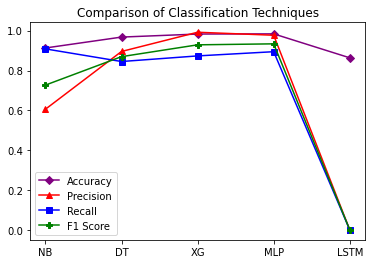

In [40]:
plt.plot(['NB','DT','XG','MLP','LSTM'],[nb_acc,dt_acc,xg_acc,mlp_acc,lstm_acc],color='purple',marker='D')
plt.plot(['NB','DT','XG','MLP','LSTM'],[nb_pre,dt_pre,xg_pre,mlp_pre,lstm_pre],color='red',marker='^')
plt.plot(['NB','DT','XG','MLP','LSTM'],[nb_rec,dt_rec,xg_rec,mlp_rec,lstm_rec],color='blue',marker='s')
plt.plot(['NB','DT','XG','MLP','LSTM'],[nb_f1,dt_f1,xg_f1,mlp_f1,lstm_f1],color='green',marker='P')
plt.legend(('Accuracy','Precision','Recall','F1 Score'))
plt.title('Comparison of Classification Techniques')

## Grid Search

In [26]:
X = np.array(corpus)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 222)

from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

# Naive Bayesian pipeline
nb_pipe = Pipeline([
 ('tvec', TfidfVectorizer()),
 ('mb', MultinomialNB())
])

nb_params = {
 'tvec__max_features':[100, 2000],
 'tvec__ngram_range': [(1, 1), (1, 2), (2, 2)],
 'tvec__stop_words': [None, 'english'],
}

# Randomforest pipeline
rf_pipe = Pipeline([
 ('tvec', TfidfVectorizer()),
 ('rf', RandomForestClassifier())
])

rf_params = {
 'tvec__max_features':[2000],
 'tvec__ngram_range': [(1, 2)],
 'tvec__stop_words': ['english'],
 'rf__max_depth': [1000],
 'rf__min_samples_split': [100],
 'rf__max_leaf_nodes': [None]
}

nb_pipe.fit(X_train, Y_train)
rf_pipe.fit(X_train, Y_train)

Pipeline(steps=[('tvec', TfidfVectorizer()), ('rf', RandomForestClassifier())])

In [27]:
from sklearn.model_selection import GridSearchCV

nb_grid = GridSearchCV(nb_pipe, param_grid=nb_params, cv = 5, verbose =1, n_jobs = -1)
nb_grid.fit(X_train, Y_train)


rf_grid = GridSearchCV(rf_pipe, param_grid=rf_params, cv = 5, verbose = 1, n_jobs = -1)
rf_grid.fit(X_train, Y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('rf', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'rf__max_depth': [1000], 'rf__max_leaf_nodes': [None],
                         'rf__min_samples_split': [100],
                         'tvec__max_features': [2000],
                         'tvec__ngram_range': [(1, 2)],
                         'tvec__stop_words': ['english']},
             verbose=1)

In [28]:
nb_grid.score(X_train, Y_train)
nb_grid.score(X_test, Y_test)

rf_grid.score(X_train, Y_train)
rf_grid.score(X_test, Y_test)

0.979372197309417

## USER INPUT

In [46]:
naive_model = pickle.load(open('models/naive_model.pkl', 'rb'))
dt_model = pickle.load(open('models/dt_model.pkl', 'rb'))
xg_model = pickle.load(open('models/xg_model.pkl', 'rb'))
mlp_model = pickle.load(open('models/mlp_model.pkl', 'rb'))
lstm_model = load_model('models/lstm_model.h5')

In [137]:
text = str(input())
corpus = []
sms = re.sub('[^a-zA-Z]', ' ' ,text)
sms = sms.lower()
sms = sms.split()
sms = [ps.stem(word) for word in sms if not word in set(stw.words('english'))]
sms = ' '.join(sms)
corpus.append(sms)

cv = CountVectorizer(max_features = 10000) #Count Vectorization
tfidf =  TfidfVectorizer(max_features=10000, ngram_range=(1,3)) #TFIDF Vectorization
hvectorizer = HashingVectorizer(n_features=10000) #Hash Vectorization

U = cv.fit_transform(corpus).toarray()

Free entry in 2 a wkly comp to win FA Cup


In [138]:
shape = list(U.shape)
shape[1]

padU = np.pad(U[0], (0,10000-shape[1]), 'constant', constant_values=(0, 0))
newU = []
newU.append(padU)
arr = np.array(newU)
padU.shape
arr.shape

7

In [142]:
nbU = mlp_model.predict(arr)
print(nbU)